Iteration    0: Cost 4.90e-01  dj_dw: -1.000e+00, dj_db:  0.000e+00   w:  1.000e-02, b: 0.00000e+00
Iteration   40: Cost 2.19e-01  dj_dw: -6.690e-01, dj_db:  0.000e+00   w:  3.377e-01, b:-7.40149e-19
Iteration   80: Cost 9.81e-02  dj_dw: -4.475e-01, dj_db:  3.701e-17   w:  5.570e-01, b:-1.11022e-18
Iteration  120: Cost 4.39e-02  dj_dw: -2.994e-01, dj_db:  0.000e+00   w:  7.036e-01, b:-1.11022e-18
Iteration  160: Cost 1.97e-02  dj_dw: -2.003e-01, dj_db:  0.000e+00   w:  8.017e-01, b:-1.57282e-18
Iteration  200: Cost 8.80e-03  dj_dw: -1.340e-01, dj_db:  0.000e+00   w:  8.674e-01, b:-1.57282e-18
Iteration  240: Cost 3.94e-03  dj_dw: -8.963e-02, dj_db:  0.000e+00   w:  9.113e-01, b:-1.57282e-18
Iteration  280: Cost 1.76e-03  dj_dw: -5.996e-02, dj_db:  0.000e+00   w:  9.406e-01, b:-1.57282e-18
Iteration  320: Cost 7.88e-04  dj_dw: -4.011e-02, dj_db:  0.000e+00   w:  9.603e-01, b:-1.57282e-18
Iteration  360: Cost 3.53e-04  dj_dw: -2.683e-02, dj_db:  0.000e+00   w:  9.734e-01, b:-1.57282e-18


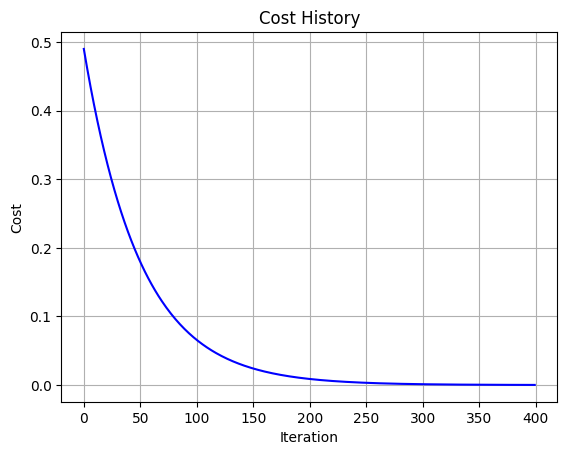

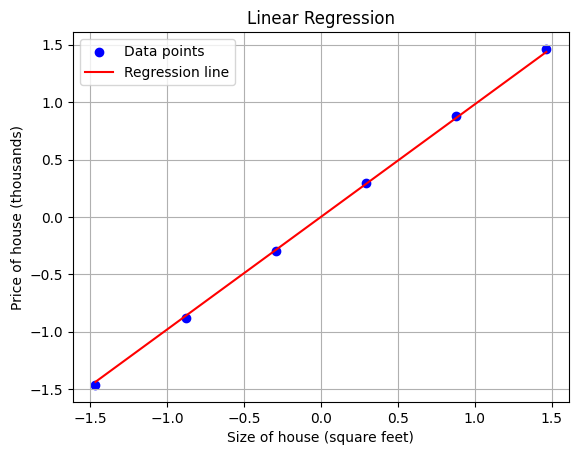

In [42]:
# Gradient descent for linear regression
import numpy as np
import matplotlib.pyplot as plt
import math

# Function to calculate the cost
def compute_cost(x, y, w, b):
    m = len(y)
    cost = 0.0
    for i in range(m):
        cost += (w * x[i] + b - y[i]) ** 2
    cost /= (2 * m)
    return cost

# Function to compute gradient descent
def compute_gradient(x, y, w, b):
    m = len(y)
    dj_dw = 0
    dj_db = 0
    for j in range(m):
        dj_dw += (w * x[j] + b - y[j]) * x[j]
        dj_db += (w * x[j] + b - y[j])
    dj_dw /= m
    dj_db /= m
    return dj_dw, dj_db

# Function to perform gradient descent
def gradient_descent(x, y, w_init, b_init, alpha, num_iterations):
    w = w_init
    b = b_init
    J_history = []
    p_history = []

    for i in range(num_iterations):
        # Calculate the gradient and update the parameters using gradient_function
        dj_dw, dj_db = compute_gradient(x, y, w, b)
        # Update Parameters using equation above
        w -= alpha * dj_dw
        b -= alpha * dj_db
        # Save cost J at each iteration
        cost = compute_cost(x, y, w, b)
        J_history.append(cost)
        p_history.append([w,b])

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iterations/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")

    return w, b, J_history, p_history

# Function to plot the cost history
def plot_cost_history(cost_history):
    plt.plot(range(len(cost_history)), cost_history, 'b-')
    plt.xlabel('Iteration')
    plt.ylabel('Cost')
    plt.title('Cost History')
    plt.grid()
    plt.show()

# Function to plot the regression line
def plot_regression_line(x, y, w, b):
    plt.scatter(x, y, color='blue', label='Data points')
    plt.plot(x, w * x + b, color='red', label='Regression line')
    plt.xlabel('Size of house (square feet)')
    plt.ylabel('Price of house (thousands)')
    plt.title('Linear Regression')
    plt.legend()
    plt.grid()
    plt.show()
    
# Main function to run the gradient descent
def main():
    # Prices of the houses in thousands sample data
    # x: size of the house in square feet, y: price of the house in thousands
    # Example data
    x = np.array([1500, 1600, 1700, 1800, 1900, 2000])
    y = np.array([300, 320, 340, 360, 380, 400])
    # Normalize the data
    x = (x - np.mean(x)) / np.std(x)
    y = (y - np.mean(y)) / np.std(y)
    # Ensure x and y are 1D arrays
    x = x.flatten()
    y = y.flatten()
    # Ensure x and y are numpy arrays
    x = np.array(x)
    y = np.array(y)
    # Initial weights and bias
    w_init = 0.0
    b_init = 0.0
    # Learning rate and number of iterations
    alpha = 0.01
    num_iterations = 400
    # Perform gradient descent
    w, b, cost_history, p_history = gradient_descent(x, y, w_init, b_init, alpha, num_iterations)
    # Plot the cost history
    plot_cost_history(cost_history)
    # Plot the regression line
    plot_regression_line(x, y, w, b)

    
if __name__ == "__main__":
    main()

